In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from sklearn.pipeline import Pipeline

In [4]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

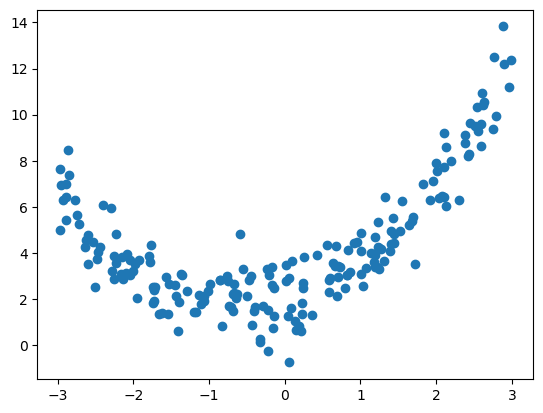

In [5]:
plt.scatter(X,y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

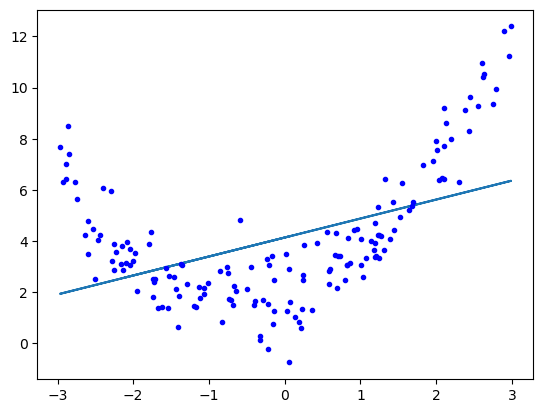

In [8]:
plt.plot(X_train,lin_reg.predict(X_train))
plt.plot(X_train,y_train,'b.')

In [9]:
Y_pred = lin_reg.predict(X_test)

In [10]:
r2_score(y_pred=Y_pred,y_true=y_test)

0.242088581978249

In [11]:
poly = PolynomialFeatures(degree = 2,include_bias=True)

In [12]:
X_train_trans = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [13]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_trans,y_train)

LinearRegression()

In [14]:
y_pred = poly_reg.predict(X_test)
r2_score(y_pred=y_pred,y_true=y_test)

0.8840967481795443

In [15]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = poly_reg.predict(X_new_poly)

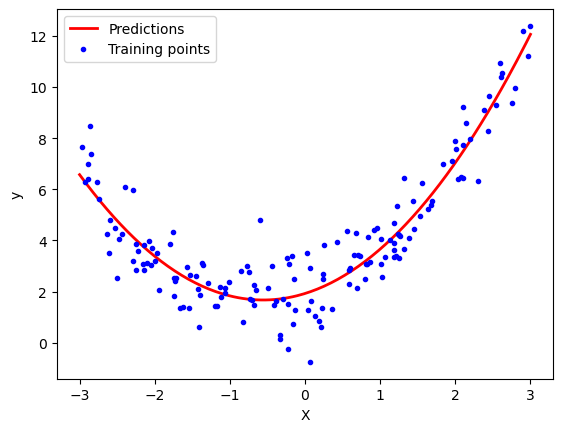

In [16]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [27]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

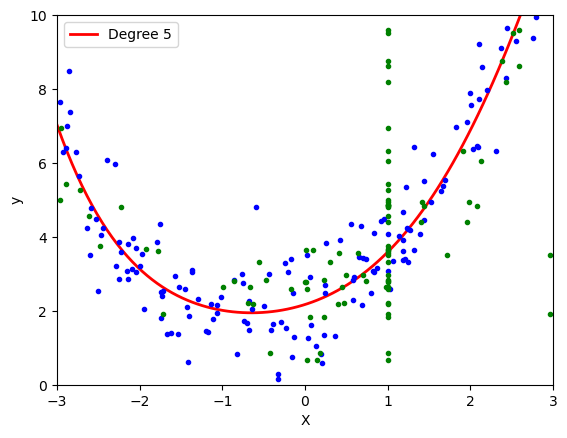

In [28]:
polynomial_regression(degree=5)